# Exercise-04

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

## Task-01: k-Nearest Neighbors.

### Create dataset using make_blobs.

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

### Visualise the created data.

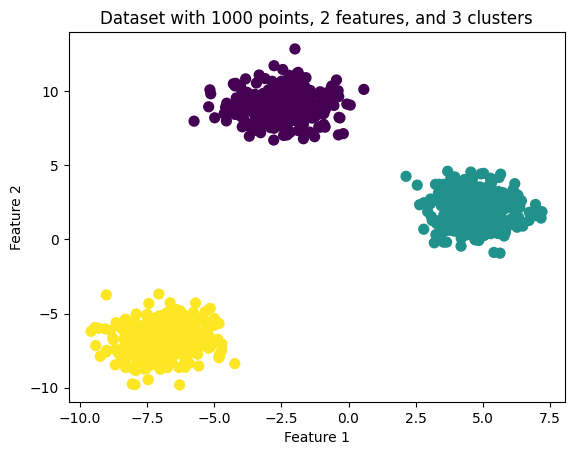

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Dataset with {1000} points, {2} features, and {3} clusters")
plt.show()

### Split data into training set and test set.

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Train the KNN model, predict the values using model. 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',
                         leaf_size=30,metric='minkowski',metric_params=None,n_jobs=None)

model=KNN.fit(X_train,y_train)

predicted=model.predict(X)

### Predict the accuracy score of the model.

In [49]:
from sklearn.metrics import accuracy_score

print("The accuracy of KNN model when k=5 is: ",
      accuracy_score(y,predicted,normalize=True,sample_weight=None))

The accuracy of KNN model when k=5 is:  1.0


### Visualise the predictions and true data points.

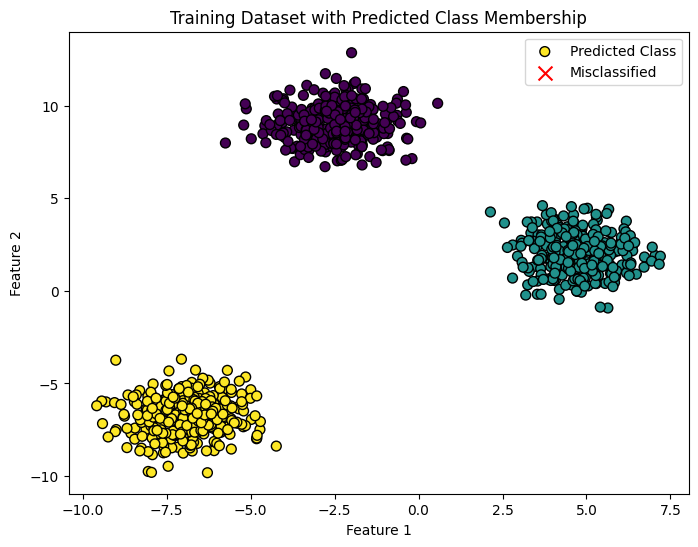

In [43]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=predicted, cmap='viridis', marker='o', edgecolor='k', s=50, label='Predicted Class')

misclassified = predicted != y  # Boolean array of misclassified points
plt.scatter(X[misclassified, 0], X[misclassified, 1], color='red', marker='x', s=100, label='Misclassified')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training Dataset with Predicted Class Membership")
plt.legend(loc="best")
plt.show()

### Check the accuray for the model when the k=1.

In [48]:
KNN_1=KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',
                         leaf_size=30,metric='minkowski',metric_params=None,n_jobs=None)

model=KNN_1.fit(X_train,y_train)

predicted1=model.predict(X)
print("The accuracy of KNN model when k=1 is: ",
      accuracy_score(y,predicted1,normalize=True,sample_weight=None))

The accuracy of KNN model when k=1 is:  1.0


## Task-02: SVM classification.

### Read and analyse data.

In [5]:
mnist=pd.read_csv('mnist_train.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# analysis of data:
print("The data types of the columns are:\n",mnist.dtypes)
print("\nThe dimensions of the dataset are:\n",mnist.shape)
print("\nThe number of columns in the dataset is:\n",mnist.shape[1])
missing_values = mnist.isna().sum().sum()
print("\nFollowing is the number of missing values in the dataset: ",missing_values)


The data types of the columns are:
 label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

The dimensions of the dataset are:
 (42000, 785)

The number of columns in the dataset is:
 785

Following is the number of missing values in the dataset:  0


### Ploting a data point from mnist data set.

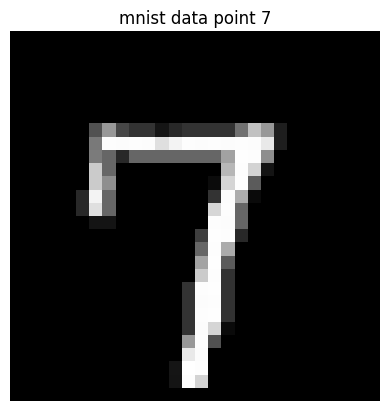

In [21]:
image = mnist.iloc[6,1:].values

image = np.reshape(image, (28, 28))

plt.imshow(image, cmap='gray')
plt.title("mnist data point 7")
plt.axis('off')  
plt.show()


### Data preparation

#### Change the range of image data between 0 and 1.

In [8]:
image=mnist.iloc[:,1:].values/255.0

In [9]:
X=image
y=mnist.iloc[:,0].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Creation of linear SVC model. 

In [12]:
from sklearn.svm import SVC

svm_lin=SVC(kernel='linear')

model_lin=svm_lin.fit(X_train,y_train)

In [13]:
y_predlin=model_lin.predict(X_test)


print("Accuracy score of the linear SVM model is: ",accuracy_score(y_predlin,y_test))

Accuracy score of the linear SVM model is:  0.9320238095238095


### Confusion matrix for linear svm

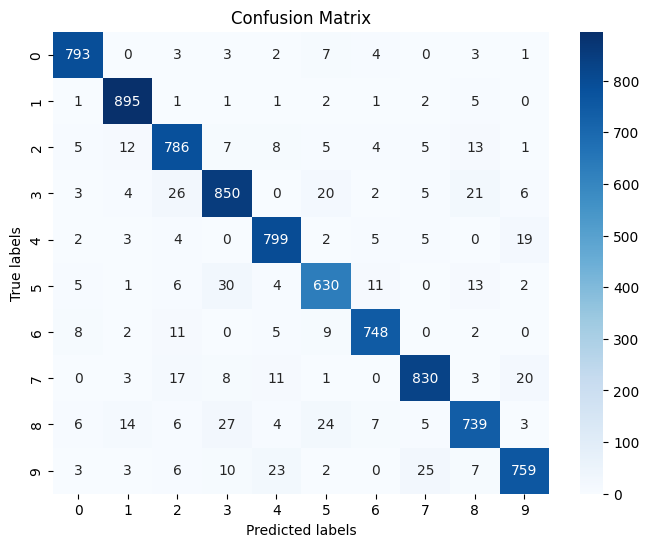

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_predlin)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt="d",cmap="Blues",xticklabels=model_lin.classes_,yticklabels=model_lin.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

### Creation of radial basis function SVM mode

In [10]:
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
model_rbf=svm_rbf.fit(X_train,y_train)

In [11]:
y_predrbf=model_rbf.predict(X_test)
print("Accuracy score of the radial basis function SVM model is: ",accuracy_score(y_predrbf,y_test))

Accuracy score of the radial basis function SVM model is:  0.973452380952381


### Confusion matrix for radial basis function SVM

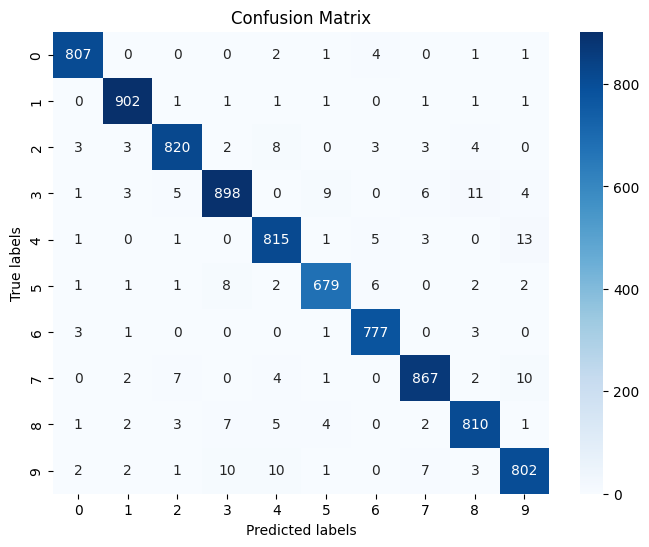

In [19]:
conf_matrix1=confusion_matrix(y_test,y_predrbf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix1,annot=True, fmt="d",cmap="Blues",xticklabels=model_rbf.classes_,yticklabels=model_rbf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## Task-03: Clustering

In [22]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


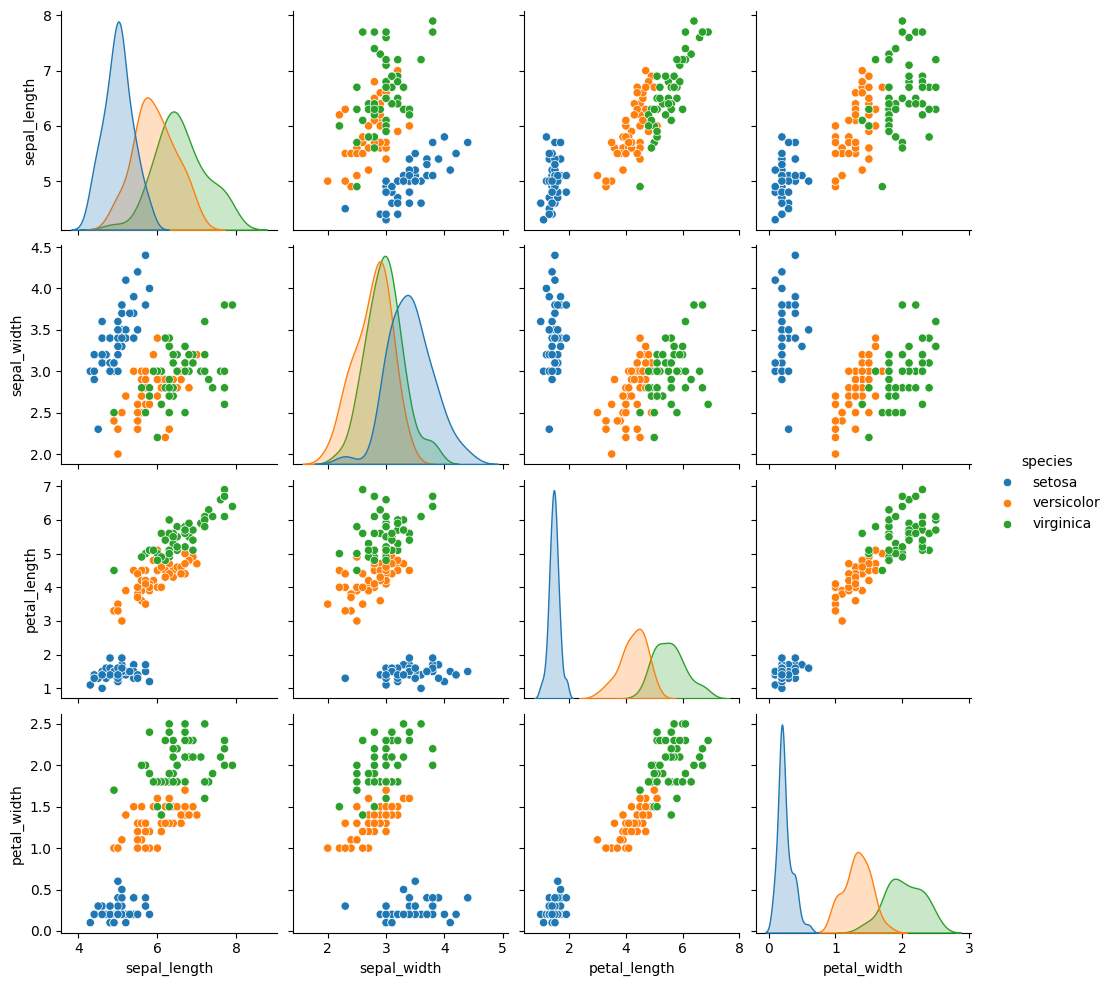

In [27]:
sns.pairplot(iris, diag_kind='kde', hue='species')

# Display the plot
plt.show()


### K-means clustering

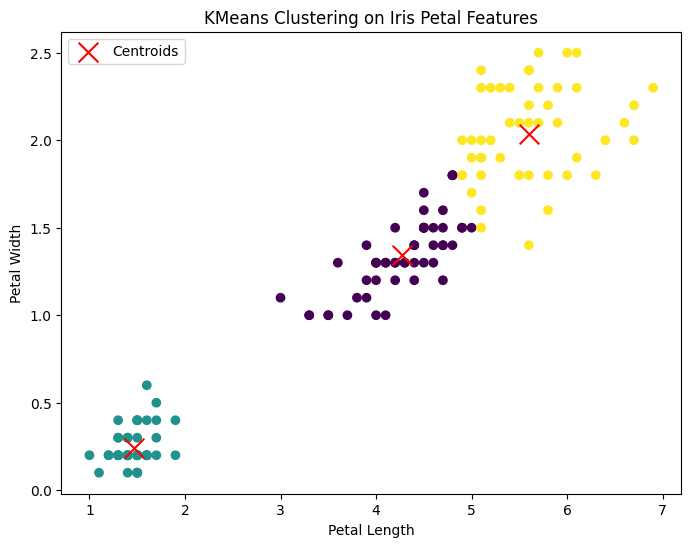

In [32]:
from sklearn.cluster import KMeans

X = iris[['petal_length', 'petal_width']]

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plot the KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['petal_length'], X['petal_width'], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering on Iris Petal Features')
plt.legend()
plt.show()


## DB-scan

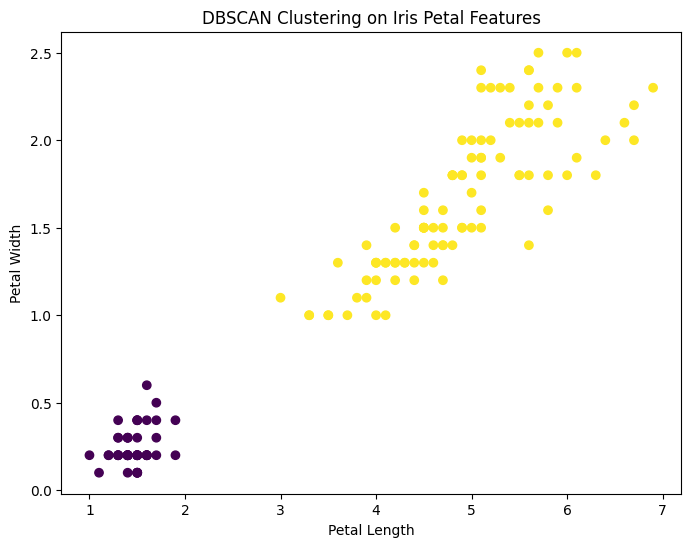

In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X['petal_length'], X['petal_width'], c=dbscan.labels_, cmap='viridis', marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('DBSCAN Clustering on Iris Petal Features')
plt.show()

## Task-04: Classification of the Iris dataset using algorithm of choice. 

In [2]:
iri=pd.read_csv('penguins.csv')
iri.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
iri.shape

(344, 9)

In [9]:
iri.dropna(inplace=True)

In [11]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

y=iri['species']
X=iri[['bill_length_mm','body_mass_g','flipper_length_mm','bill_depth_mm']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
linearsvc=LinearSVC()

model=linearsvc.fit(X_train,y_train)

In [15]:
perds=model.predict(X_test)

print('Accuracy of the model is: ',accuracy_score(perds,y_test)*100,'%')

Accuracy of the model is:  98.80952380952381 %


In [16]:
from sklearn.metrics import classification_report


print(classification_report(y_test,perds))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.95      1.00      0.98        20
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

